<a href="https://colab.research.google.com/github/adelgadop/qualR_tuto/blob/main/qualR_set2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+http://github.com/quishqa/qualR.py.git

  Cloning http://github.com/quishqa/qualR.py.git to /tmp/pip-req-build-nfubr3gc
  Running command git clone --filter=blob:none --quiet http://github.com/quishqa/qualR.py.git /tmp/pip-req-build-nfubr3gc
  Resolved http://github.com/quishqa/qualR.py.git to commit cdee39d52bb15b3123ad7f90bd247cbae8a4864c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 6.6 MB/s eta 0:00:00
  Created wheel for qualRpy: filename=qualRpy-0.9.0-py3-none-any.whl size=7807 sha256=91ab512cbb6fc779b3ce449aa743ac2ecda1cec5d981e8f2be115d7622d3f544
  Stored in directory: /tmp/pip-ephem-wheel-cache-otd3t8xe/wheels/91/82/6a/3fad11047099d902421dbb26c228a2a24b78cc2f669a47c647
Successfully built qualRpy


## 3) Considere a base de dados de MP10 e MP2.5 para diferentes estações de qualidade do ar da CETESB para o período de janeiro-fevereiro de 2014 e março-setembro de 2020.

a) Faça um gráfico da variação horária do Material Particulado nas estações e analise o horário de ocorrência dos valores máximos de concentração.

b) Analise o comportamento do MP2.5 em cada estação, seus valores médios para 24h e máximos e as possíveis causas de diferença.

c) Faça um gráfico da variação de MP2,5 e MP10 e discuta as suas fontes.

In [57]:
import qualRpy.qualR as qr
import pandas as pd
import matplotlib.pyplot as plt
import getpass

In [8]:
aqs = qr.cetesb_aqs()

# Search name of stations with like Google
display(aqs.loc[aqs.name.str.contains('USP'),:])
stations = ['Pinheiros', 'Ibirapuera', 'Interlagos', 'Osasco', 'Pico do Jaraguá', 'Cid.Universitária-USP-Ipen']
rede = aqs.loc[aqs.name.isin(stations),:]
rede

,name,code,lat,lon
13,Cid.Universitária-USP-Ipen,95,-23.566342,-46.737414


,name,code,lat,lon
13,Cid.Universitária-USP-Ipen,95,-23.566342,-46.737414
24,Ibirapuera,83,-23.591842,-46.660688
25,Interlagos,262,-23.680508,-46.675043
38,Osasco,120,-23.526721,-46.792078
42,Pico do Jaraguá,284,-23.456269,-46.766098
43,Pinheiros,99,-23.561460,-46.702017


In [12]:
user = 'adelgado@iag.usp.br' #input('Enter username: ')
print('Enter password:')
password = getpass.getpass()
qr.cetesb_param()

Enter password:
··········


,name,code
0,BEN (Benzeno),61
1,CO (Monoxido de Carbono),16
2,DV (Direcao do Vento),23
3,DVG (Direcao do Vento Global),21
4,ERT (Enxofre Reduzido Total),19
5,HCNM (Hidrocarbonetos Totais menos Metano),59
6,MP10 (Particulas Inalaveis),12
7,MP2.5 (Particulas Inalaveis Finas),57
8,NO (Monoxido de Nitrogenio),17
9,NO2 (Dioxido de Nitrogenio),15


In [13]:
start_date = '01/01/2014'
end_date   = '01/03/2014'

pol_codes = {'pm10':12, 'pm2_5':57}
d14 = {'pm10':'', 'pm2_5':''}

for pol in pol_codes.keys():
  d14[pol] = {aqs_name: qr.cetesb_retrieve(user, password,
                                           start_date, end_date,
                                           pol_codes[pol], aqs_code)
          for aqs_name, aqs_code in zip(rede.name, rede.code)}
d14


{'pm10': {'Cid.Universitária-USP-Ipen': Empty DataFrame
  Columns: [day, hour, name, pol_name, units, val, date]
  Index: [],
  'Ibirapuera':                             day   hour        name  \
  2014-01-01 01:00:00  01/01/2014  01:00  Ibirapuera   
  2014-01-01 02:00:00  01/01/2014  02:00  Ibirapuera   
  2014-01-01 03:00:00  01/01/2014  03:00  Ibirapuera   
  2014-01-01 04:00:00  01/01/2014  04:00  Ibirapuera   
  2014-01-01 05:00:00  01/01/2014  05:00  Ibirapuera   
  ...                         ...    ...         ...   
  2014-03-01 20:00:00  01/03/2014  20:00  Ibirapuera   
  2014-03-01 21:00:00  01/03/2014  21:00  Ibirapuera   
  2014-03-01 22:00:00  01/03/2014  22:00  Ibirapuera   
  2014-03-01 23:00:00  01/03/2014  23:00  Ibirapuera   
  2014-03-02 00:00:00  01/03/2014  24:00  Ibirapuera   
  
                                          pol_name  units   val  
  2014-01-01 01:00:00  MP10 (Partículas Inaláveis)  µg/m3  20.0  
  2014-01-01 02:00:00  MP10 (Partículas Inaláveis)  µ

In [14]:
start_date = '01/03/2020'
end_date   = '01/10/2020'

pol_codes = {'pm10':12, 'pm2_5':57}
d20 = {'pm10':'', 'pm2_5':''}

for pol in pol_codes.keys():
  d20[pol] = {aqs_name: qr.cetesb_retrieve(user, password,
                                           start_date, end_date,
                                           pol_codes[pol], aqs_code)
          for aqs_name, aqs_code in zip(rede.name, rede.code)}
d20

{'pm10': {'Cid.Universitária-USP-Ipen': Empty DataFrame
  Columns: [day, hour, name, pol_name, units, val, date]
  Index: [],
  'Ibirapuera': Empty DataFrame
  Columns: [day, hour, name, pol_name, units, val, date]
  Index: [],
  'Interlagos':                             day   hour        name  \
  2020-03-06 01:00:00  06/03/2020  01:00  Interlagos   
  2020-03-06 02:00:00  06/03/2020  02:00  Interlagos   
  2020-03-06 03:00:00  06/03/2020  03:00  Interlagos   
  2020-03-06 04:00:00  06/03/2020  04:00  Interlagos   
  2020-03-06 05:00:00  06/03/2020  05:00  Interlagos   
  ...                         ...    ...         ...   
  2020-10-01 20:00:00  01/10/2020  20:00  Interlagos   
  2020-10-01 21:00:00  01/10/2020  21:00  Interlagos   
  2020-10-01 22:00:00  01/10/2020  22:00  Interlagos   
  2020-10-01 23:00:00  01/10/2020  23:00  Interlagos   
  2020-10-02 00:00:00  01/10/2020  24:00  Interlagos   
  
                                          pol_name  units    val  
  2020-03-06 01:

In [15]:
# We export the data as pickle
import pickle
with open("d14.pkl", "wb") as my_pickle:
  pickle.dump(d14, my_pickle)

with open("d20.pkl", "wb") as my_pickle:
  pickle.dump(d20, my_pickle)

a) Faça um gráfico da variação horária do Material Particulado nas estações e analise o horário de ocorrência dos valores máximos de concentração.

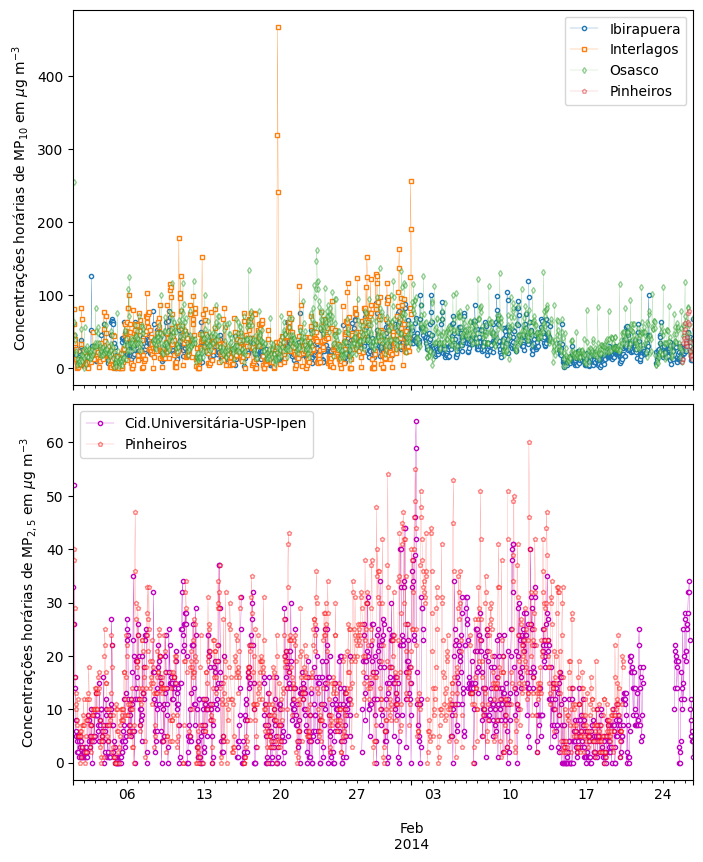

In [71]:
unidades = '$\mu$g m$^{-3}$'
mp2_5 = 'MP$_{2,5}$'
mp10 = 'MP$_{10}$'

nomes = list(d14['pm10'].keys())
fig, (ax,ax2) = plt.subplots(2,1, figsize=(8, 10), sharex=True, sharey=False, gridspec_kw={'hspace':.05})
d14['pm10'][nomes[1]].val.resample('H').mean().plot(ax=ax, label=nomes[1], style='-o', lw=.2, markersize=3, markerfacecolor='w')
d14['pm10'][nomes[2]].val.resample('H').mean().plot(ax=ax, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
d14['pm10'][nomes[3]].val.resample('H').mean().plot(ax=ax, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d14['pm10'][nomes[5]].val.resample('H').mean().plot(ax=ax, label=nomes[5], style='-p', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
ax.set_ylabel(f'Concentrações horárias de {mp10} em {unidades}')
ax.legend()

d14['pm2_5'][nomes[0]].val.resample('H').mean().plot(ax=ax2, label=nomes[0], style='-o', color='m', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[1]].val.resample('H').mean().plot(ax=ax2, label=nomes[1], style='-o', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[3]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
#d14['pm2_5'][nomes[4]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d14['pm2_5'][nomes[5]].val.resample('H').mean().plot(ax=ax2, label=nomes[5], style='-p', color='r',lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
ax2.set_ylabel(f'Concentrações horárias de {mp2_5} em {unidades}')
ax2.legend()

fig.savefig('pm_horario.png', dpi=600, bbox_inches='tight', facecolor='w')
plt.show()

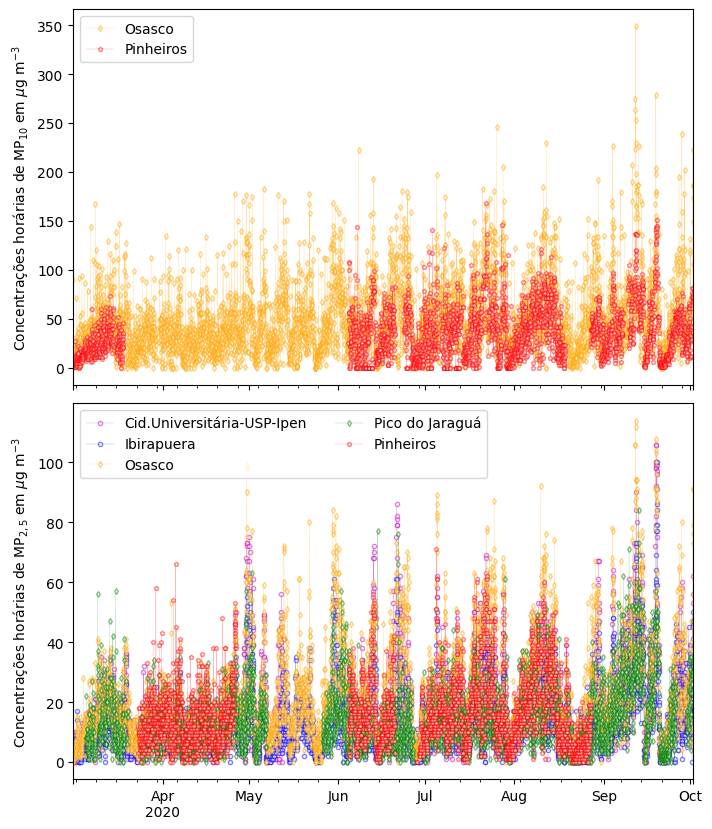

In [95]:
unidades = '$\mu$g m$^{-3}$'
mp2_5 = 'MP$_{2,5}$'
mp10 = 'MP$_{10}$'

nomes = list(d20['pm10'].keys())
fig, (ax,ax2) = plt.subplots(2,1, figsize=(8, 10), sharex=True, sharey=False, gridspec_kw={'hspace':.05})
#d20['pm10'][nomes[0]].val.resample('H').mean().plot(ax=ax, label=nomes[0], style='-o', color='m', lw=.2, markersize=3, markerfacecolor='w')
#d20['pm10'][nomes[1]].val.resample('H').mean().plot(ax=ax, label=nomes[1], style='-o', lw=.2, markersize=3, markerfacecolor='w')
#d20['pm10'][nomes[2]].val.resample('H').mean().plot(ax=ax, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
d20['pm10'][nomes[3]].val.resample('H').mean().plot(ax=ax, label=nomes[3], color = 'orange', style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
#d20['pm10'][nomes[4]].val.resample('H').mean().plot(ax=ax, label=nomes[4], style='-d', color='g', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d20['pm10'][nomes[5]].val.resample('H').mean().plot(ax=ax, label=nomes[5], color = 'r', style='-p', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
ax.set_ylabel(f'Concentrações horárias de {mp10} em {unidades}')
ax.legend()

d20['pm2_5'][nomes[0]].val.resample('H').mean().plot(ax=ax2, label=nomes[0], style='-o', color='m', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d20['pm2_5'][nomes[1]].val.resample('H').mean().plot(ax=ax2, label=nomes[1], style='-o', color='b', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
#d20['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[3]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', color='orange', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d20['pm2_5'][nomes[4]].val.resample('H').mean().plot(ax=ax2, label=nomes[4], style='-d', color='g', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d20['pm2_5'][nomes[5]].val.resample('H').mean().plot(ax=ax2, label=nomes[5], style='-p', color='r',lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
ax2.set_ylabel(f'Concentrações horárias de {mp2_5} em {unidades}')
ax2.legend(ncol=2)

fig.savefig('pm_horario_2020.png', dpi=600, bbox_inches='tight', facecolor='w')
plt.show()

b) Analise o comportamento do MP2.5 em cada estação, seus valores médios para 24h e máximos e as possíveis causas de diferença.

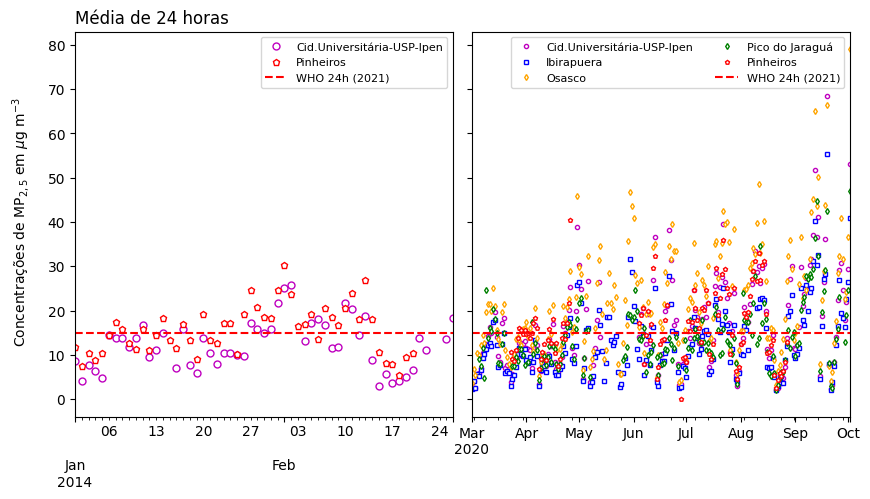

In [138]:
nomes = list(d20['pm10'].keys())
fig, (ax,ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=False, sharey=True, gridspec_kw={'wspace':.05})
d14['pm2_5'][nomes[0]].val.resample('D').mean().plot(ax=ax, label=nomes[0], style='o', color='m', lw=1, markersize=5, markerfacecolor='w')
#d14['pm2_5'][nomes[1]].val.resample('H').mean().plot(ax=ax2, label=nomes[1], style='-o', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[3]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
#d14['pm2_5'][nomes[4]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d14['pm2_5'][nomes[5]].val.resample('D').mean().plot(ax=ax, label=nomes[5], style='p', color='r',lw=1, markersize=5, markerfacecolor='w')
ax.hlines(15, d14['pm2_5'][nomes[0]].index[0], d14['pm2_5'][nomes[0]].index[-1], color='r', linestyle='--', label='WHO 24h (2021)')
ax.legend(fontsize=8)

d20['pm2_5'][nomes[0]].val.resample('D').mean().plot(ax=ax2, label=nomes[0], style='o', color='m', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[1]].val.resample('D').mean().plot(ax=ax2, label=nomes[1], style='s', color='b', lw=1, markersize=3, markerfacecolor='w')
#d20['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[3]].val.resample('D').mean().plot(ax=ax2, label=nomes[3], style='d', color='orange', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[4]].val.resample('D').mean().plot(ax=ax2, label=nomes[4], style='d', color='g', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[5]].val.resample('D').mean().plot(ax=ax2, label=nomes[5], style='p', color='r',lw=1, markersize=3, markerfacecolor='w')
ax2.hlines(15, d20['pm2_5'][nomes[0]].index[0], d20['pm2_5'][nomes[0]].index[-1], color='r', linestyle='--', label='WHO 24h (2021)')
fig.text(0.06, 0.5, f'Concentrações de {mp2_5} em {unidades}', va='center', rotation='vertical')
ax2.legend(ncol=2, fontsize=8)
ax.set_title('Média de 24 horas', loc='left')

fig.savefig('pm2_5_mean_24h.png', dpi=400, bbox_inches='tight', facecolor='w')
plt.show()

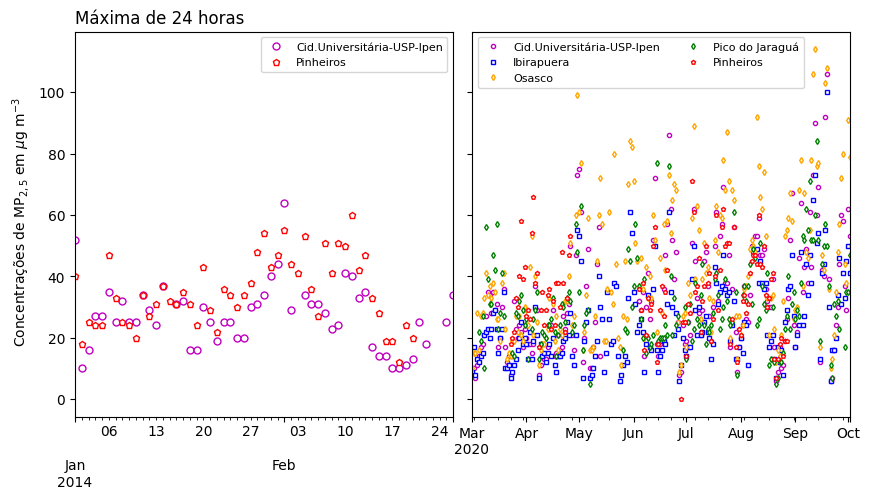

In [137]:
nomes = list(d20['pm10'].keys())
fig, (ax,ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=False, sharey=True, gridspec_kw={'wspace':.05})
d14['pm2_5'][nomes[0]].val.resample('D').max().plot(ax=ax, label=nomes[0], style='o', color='m', lw=1, markersize=5, markerfacecolor='w')
#d14['pm2_5'][nomes[1]].val.resample('H').mean().plot(ax=ax2, label=nomes[1], style='-o', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
#d14['pm2_5'][nomes[3]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
#d14['pm2_5'][nomes[4]].val.resample('H').mean().plot(ax=ax2, label=nomes[3], style='-d', lw=.2, markersize=3, markerfacecolor='w', alpha=.5)
d14['pm2_5'][nomes[5]].val.resample('D').max().plot(ax=ax, label=nomes[5], style='p', color='r',lw=1, markersize=5, markerfacecolor='w')
#ax.hlines(15, d14['pm2_5'][nomes[0]].index[0], d14['pm2_5'][nomes[0]].index[-1], color='r', linestyle='--', label='WHO 24h (2021)')
ax.legend(fontsize=8)

d20['pm2_5'][nomes[0]].val.resample('D').max().plot(ax=ax2, label=nomes[0], style='o', color='m', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[1]].val.resample('D').max().plot(ax=ax2, label=nomes[1], style='s', color='b', lw=1, markersize=3, markerfacecolor='w')
#d20['pm2_5'][nomes[2]].val.resample('H').mean().plot(ax=ax2, label=nomes[2], style='-s', lw=.2, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[3]].val.resample('D').max().plot(ax=ax2, label=nomes[3], style='d', color='orange', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[4]].val.resample('D').max().plot(ax=ax2, label=nomes[4], style='d', color='g', lw=1, markersize=3, markerfacecolor='w')
d20['pm2_5'][nomes[5]].val.resample('D').max().plot(ax=ax2, label=nomes[5], style='p', color='r',lw=1, markersize=3, markerfacecolor='w')
#ax2.hlines(15, d20['pm2_5'][nomes[0]].index[0], d20['pm2_5'][nomes[0]].index[-1], color='r', linestyle='--', label='WHO 24h (2021)')
fig.text(0.06, 0.5, f'Concentrações de {mp2_5} em {unidades}', va='center', rotation='vertical')
ax2.legend(ncol=2, fontsize=8)
ax.set_title('Máxima de 24 horas', loc='left')

fig.savefig('pm2_5_max_24h.png', dpi=400, bbox_inches='tight', facecolor='w')
plt.show()

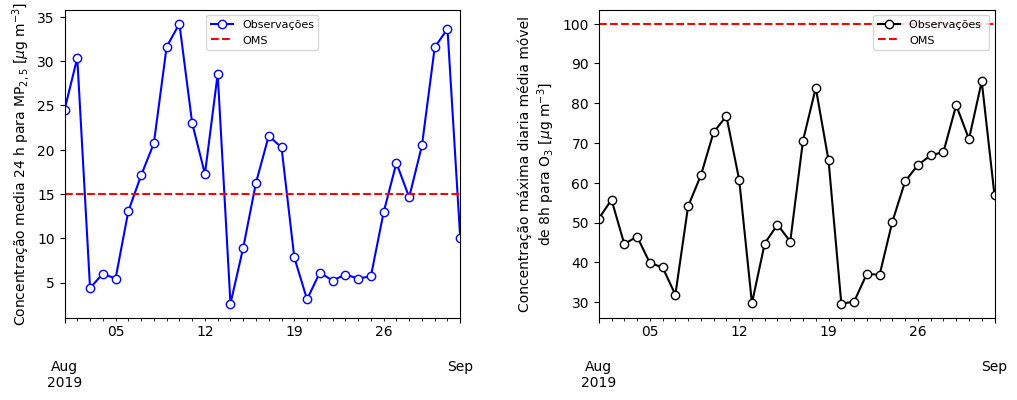

In [ ]:
unidades = '$\mu$g m$^{-3}$'
mp2_5 = 'MP$_{2,5}$'

fig, ax = plt.subplots(1, 2, figsize = (12, 4), gridspec_kw={'wspace':.35})

# Primeira figura para MP2.5
# --------------------------
(df_pol
 .pm25              # somente os dados
 .resample('D')     # resolução diaria
 .mean()            # media de 24 h
 .plot(ax = ax[0],  # construimos a figura
       ylabel = f'Concentração media 24 h para {mp2_5} [{unidades}]',
       style = '-bo',
       markerfacecolor = 'w'))

# adicionamos uma linha para o padrão
ax[0].hlines(15, df_pol.index[0], df_pol.index[-1], color='r', linestyle='--')

# adicionamos uma legenda nossa figura
ax[0].legend(['Observações', 'OMS'], ncol=1, fontsize=8)

# Segunda figura para as concentrações de ozônio
# ----------------------------------------------
(df_pol
 .o3                # escolhemos a variável
 .rolling(window=8) # escolhemos as horas para a media móvel
 .mean()
 .resample('D')     # resolução diaria
 .max()            # media de 24 h
 .plot(ax = ax[1],  # construimos a figura
       ylabel = f'Concentração máxima diaria média móvel\nde 8h para O$_3$ [{unidades}]',
       style = '-ko',
       markerfacecolor = 'w'))

# adicionamos uma linha para o padrão
ax[1].hlines(100, df_pol.index[0], df_pol.index[-1], color='r', linestyle='--')

# adicionamos uma legenda nossa figura
ax[1].legend(['Observações ', 'OMS'], ncol=1, fontsize=8)

plt.show()